In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [60]:
df = pd.read_csv('../data/data1/antibodies.csv') 
df[:5]

,patient,dpi,IgM,IgG,IgM+IgG
0,CHID46,16,0.026,0.268,0.294
1,CHID46,20,0.371,0.354,0.725
2,CHID46,23,1.927,2.047,3.974
3,CHID46,27,1.512,2.335,3.847
4,CHID46,30,1.023,2.526,3.549


In [62]:
patients = df.patient.unique()
patients

array(['CHID46', 'CHID77', 'CHID79', 'CHID32', 'CHID40', 'CHID08'],
      dtype=object)

In [208]:
def highest_rate(X,y, n):
    k = 0
    b = 0
    idx = 0
    
    for i in range(1,n+1):
        reg = LinearRegression().fit(X[:i], y[:i])
        if k < reg.coef_[0]:
            k = reg.coef_[0]
            b = reg.intercept_
            idx = i
            
    return [k,b,idx]
        

In [209]:
slopes = [[0 for j in range(3)] for i in range(6)]
intercepts = [[0 for j in range(3)] for i in range(6)]

for i in range(len(patients)):    
    dg = df.groupby('patient').get_group(patients[i])
    X = dg.dpi.values.reshape(-1,1)
    
    y1 = dg.IgM.values
    y2 = dg.IgG.values
    y3 = dg['IgM+IgG'].values
    
    n = len(dg)
    
    
    
    slopes[i][0], intercepts[i][0], _  = highest_rate(X, y1, n)
    slopes[i][1], intercepts[i][1], _  = highest_rate(X, y2, n)
    slopes[i][2], intercepts[i][2], _  = highest_rate(X, y3, n)

slopes

[[0.2615540540540541, 0.2415675675675676, 0.5031216216216217],
 [0.31760000000000005, 0.06692307692307692, 0.36200000000000004],
 [0.15492307692307694, 0.06422190201729108, 0.19084615384615386],
 [0.22446153846153852, 0.09757692307692309, 0.3220384615384615],
 [0.11788461538461538, 0.22959615384615384, 0.3474807692307692],
 [0.09396153846153847, 0.1131006389776358, 0.1971891891891892]]

In [211]:
df_ab = pd.DataFrame(patients,columns=['patient'])
df_ab[['IgM','IgG','IgM+IgG']] = slopes
df_ab.to_csv('../data/data1/antibodies_rate.csv',index=False)
df_ab

,patient,IgM,IgG,IgM+IgG
0,CHID46,0.261554,0.241568,0.503122
1,CHID77,0.317600,0.066923,0.362000
2,CHID79,0.154923,0.064222,0.190846
3,CHID32,0.224462,0.097577,0.322038
4,CHID40,0.117885,0.229596,0.347481
5,CHID08,0.093962,0.113101,0.197189


In [198]:
pd.DataFrame(slopes, columns=['IgM','IgG','IgM+IgG'],index = patients)

,IgM,IgG,IgM+IgG
CHID46,0.261554,0.241568,0.503122
CHID77,0.317600,0.066923,0.362000
CHID79,0.154923,0.064222,0.190846
CHID32,0.224462,0.097577,0.322038
CHID40,0.117885,0.229596,0.347481
CHID08,0.093962,0.113101,0.197189


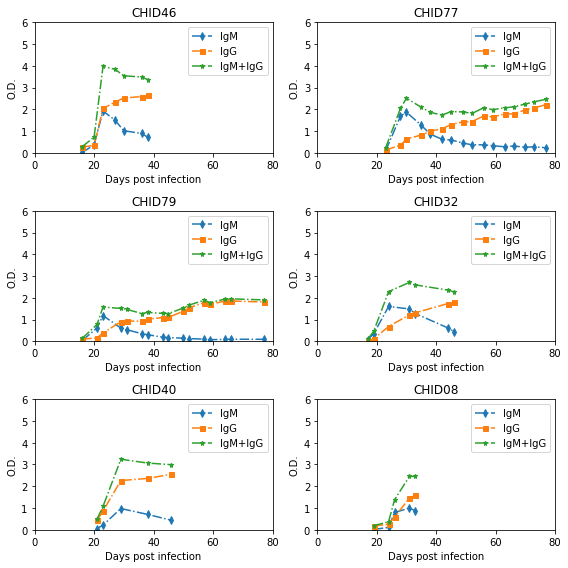

In [193]:
# plot antibodies response
plt.figure(figsize=(8,8),tight_layout=True)

for n in range(6):
    ax = plt.subplot(321+n)
    ax.set_xlim(left=0, right=80)
    ax.set_ylim(bottom=0, top=6)

    dg = df.groupby(['patient']).get_group(patients[n])
    
    markers = ["d","s","*"]
    antibodies = ['IgM','IgG','IgM+IgG']
    
    for i in range(3):
        subdg = dg[['dpi',antibodies[i]]].dropna()
        x = subdg.dpi
        
        plt.plot(x, subdg[antibodies[i]], marker=markers[i],markersize=5,label = antibodies[i],linestyle='dashdot')
        
        plt.legend()
    
    plt.title(patients[n]) 
    plt.xlabel('Days post infection')
    plt.ylabel('O.D.')    
    
    
plt.show()

In [106]:
for i in range(len(patients)):    
    dg = df.groupby('patient').get_group(patients[i])
    X = dg.dpi.values.reshape(-1,1)
    
    idx1 = dg.IgM.idxmax() + 1
    y1 = dg.IgM.values
    idx1 = fdd(y1)
    
    idx2 = dg.IgM.idxmax() + 1
    y2 = dg.IgG.values
    idx2 = fdd(y2)
    
    
    idx3 = dg['IgM+IgG'].idxmax()+1
    y3 = dg['IgM+IgG'].values
    idx3 = fdd(y3)
    
    
    
    reg1 = LinearRegression().fit(X[:idx1], y1[:idx1])
    reg2 = LinearRegression().fit(X[:idx2], y2[:idx2])
    reg3 = LinearRegression().fit(X[:idx3], y3[:idx3])
    
    slopes[i][0] = reg1.coef_[0]
    slopes[i][1] = reg2.coef_[0]
    slopes[i][2] = reg3.coef_[0]
    print([reg1.coef_[0],reg2.coef_[0],reg3.coef_[0]])
    

[0.2615540540540541, 0.2139692307692308, 0.5031216216216217]
[0.2657692307692308, 0.05994594594594595, 0.33269230769230773]
[0.15492307692307694, 0.06352702702702702, 0.19084615384615386]
[0.22446153846153852, 0.08860171306209855, 0.19608565310492518]
[0.11788461538461538, 0.11425178826895567, 0.3474807692307692]
[0.08890540540540541, 0.1131006389776358, 0.1971891891891892]


In [157]:
len(dg)

7

In [168]:
dg = df.groupby('patient').get_group(patients[0])
X = dg.dpi.values.reshape(-1,1)
y3 = dg['IgM+IgG'].values
highest_decay(X,y3,len(dg))

[0.5031216216216217, -8.230391891891893, 3]

In [142]:
df.groupby('patient').get_group('CHID46')

,patient,dpi,IgM,IgG,IgM+IgG
0,CHID46,16,0.026,0.268,0.294
1,CHID46,20,0.371,0.354,0.725
2,CHID46,23,1.927,2.047,3.974
3,CHID46,27,1.512,2.335,3.847
4,CHID46,30,1.023,2.526,3.549
5,CHID46,36,0.896,2.592,3.488
6,CHID46,38,0.728,2.647,3.375


[0.09396154]
-1.8534487179487182


[0.09396153846153847, -1.8534487179487182, 3]

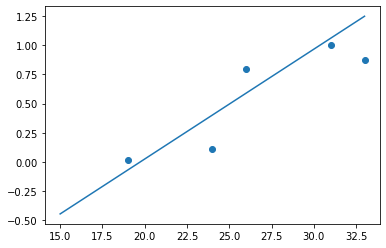

In [183]:
dg = df.groupby('patient').get_group('CHID08')
idx1 = dg.IgM.idxmax() + 1
y1 = dg.IgM.values

idx2 = dg.IgG.idxmax() + 1
y2 = dg.IgG.values

y2 = dg.IgG.values
y3 = dg['IgM+IgG'].values

X = dg.dpi.values.reshape(-1,1)

reg = LinearRegression().fit(X[:3], y1[:3])
k = reg.coef_[0]
print(reg.coef_)
plt.scatter(X,y1)


b = reg.intercept_
print(b)
t = np.arange(15,35,2)
plt.plot(t, k*t+b)

highest_decay(X, y1, len(dg))

In [140]:
# find the day that antibodies starting decay or saturate 
def fdd(d):
    n = len(d)
    
    old_diff = 0
    for i in range(1,n):
        new_diff = d[i] - d[i-1]
        if new_diff < 0:
            return i
        
        if new_diff < old_diff:
            return i + 1
        
        old_diff = new_diff
        
        
        
fdd(dg.IgG.values)

4